In [1]:
##Import  the dependecies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn = pd.read_csv('Churn_Modelling.csv')

In [3]:
churn.head() ##Top 5 values

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn.shape

(10000, 14)

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#Categorical Data types
churn.select_dtypes(include ='object' ).columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [7]:
#numerical columns
churn.select_dtypes(include =['int64','float64'] ).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [8]:
##Statistical summary

churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
##Finding missing data

churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Encode Categorical data 

In [10]:
churn.select_dtypes(include ='object' ).columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [11]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
## RowNumber, customerID and Surname is not required for the prediction so we can drop that 

churn = churn.drop(columns = ['RowNumber','CustomerId','Surname'])

In [13]:
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
churn.select_dtypes(include ='object' ).columns

Index(['Geography', 'Gender'], dtype='object')

In [15]:
churn['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [16]:
churn['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [17]:
churn.groupby('Geography').mean()  #Customer from germany has more avg balance

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [18]:
churn.groupby('Gender').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


#### Using One hot encoding

In [19]:
## Using one hot encoding for the encode categorical data to numerical

churn = pd.get_dummies(data=churn,drop_first=True)

In [20]:
churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


#### Count plot

c:\users\anindya das\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

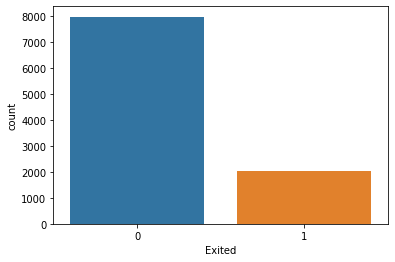

In [21]:
sns.countplot(churn['Exited'])
plt.plot

# there are 8000 customer who are staying with the bank and
#around 2000 customer who left the bank 

In [22]:
(churn.Exited==0).sum()  ## Customer staying with the bank

7963

In [23]:
(churn.Exited==1).sum()  ## Customer left with the bank

2037

#### Correlation matrix and heatmap

In [24]:
data = churn.drop(columns = 'Exited')

<AxesSubplot: title={'center': 'Correlation with Exited'}>

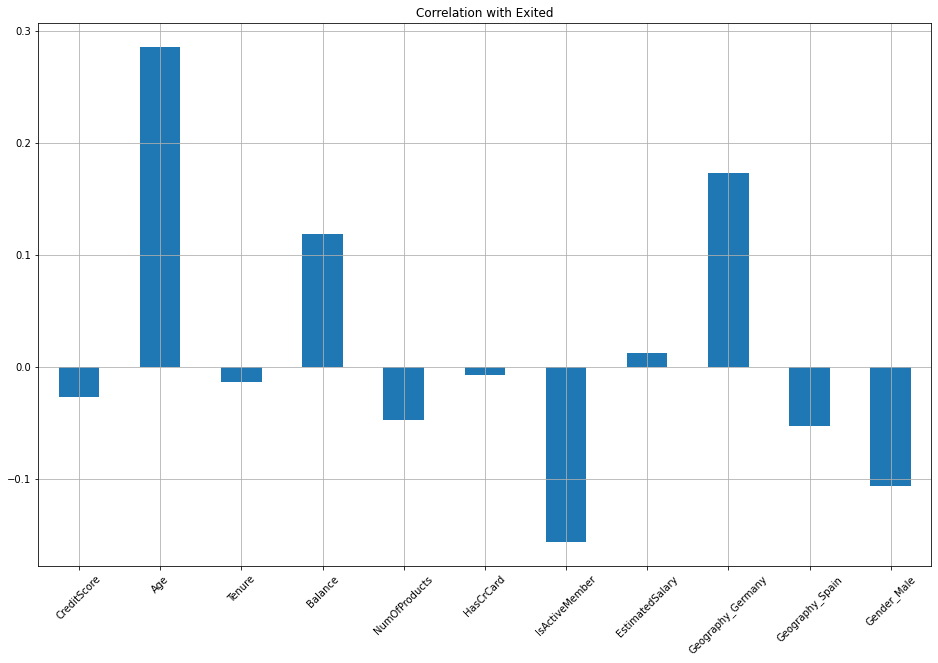

In [25]:
data.corrwith(churn['Exited']).plot.bar(
figsize = (16,10),title = 'Correlation with Exited',rot=45,grid = True)

In [26]:
corr= churn.corr()

<AxesSubplot: >

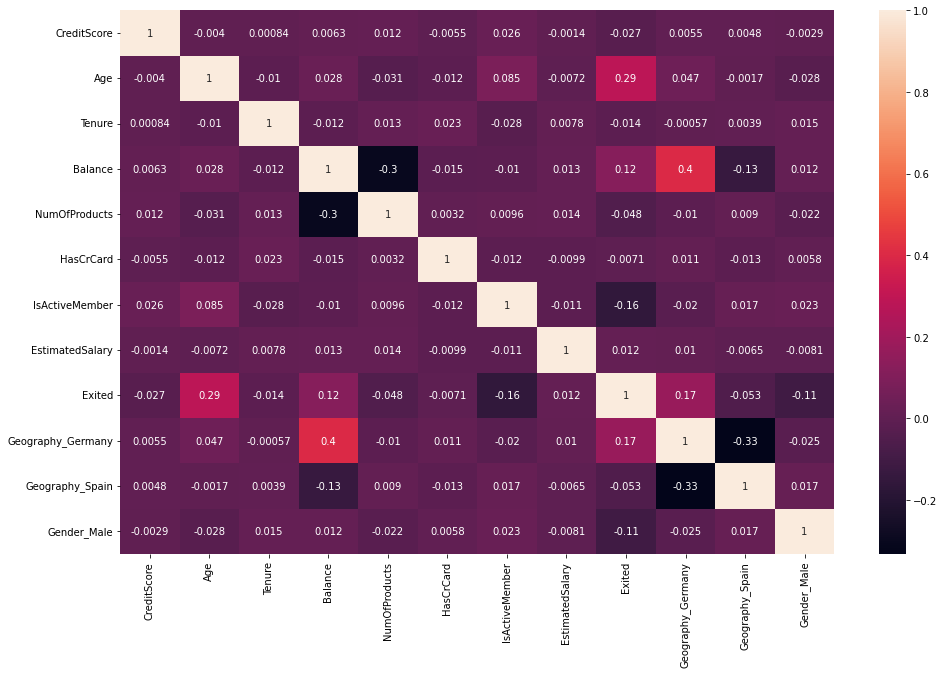

In [27]:
plt.figure(figsize = (16,10))
sns.heatmap(corr,annot = True)

### Spliting the data

In [28]:
churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [29]:
#Independent Variable /matrix of feature
X = churn.drop(columns = 'Exited')

In [30]:
#Target variable 
y = churn['Exited']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=0)

In [33]:
X_train .shape

(8000, 11)

In [34]:
X_test.shape

(2000, 11)

In [35]:
y_train.shape

(8000,)

In [36]:
y_test.shape

(2000,)

### Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [40]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [41]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

### Model Building

In [42]:
 ### Logistic Regression
from sklearn.linear_model import LogisticRegression

In [43]:
clf = LogisticRegression(random_state=0)

In [44]:
clf.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [45]:
y_pred = clf.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score

In [47]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [48]:
result = pd.DataFrame([['Logistic regression',acc,f1,prec,rec]],
                     columns = ['Model','accuracy_score','f1','precision_score','recall_score'])

In [49]:
result

,Model,accuracy_score,f1,precision_score,recall_score
0,Logistic regression,0.811,0.336842,0.581818,0.237037


In [50]:
cm = confusion_matrix(y_test,y_pred)

In [51]:
print(cm)

[[1526   69]
 [ 309   96]]


#### Cross val Score

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
accuracies = cross_val_score(estimator = clf,X=X_train,y = y_train,cv=10)

In [54]:
print("Accracy is {:2f} %".format(accuracies.mean()*100))
print("Standard veviation is {:2f} %".format(accuracies.std()*100))


Accracy is 80.837500 %
Standard veviation is 0.878653 %


#### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
random = RandomForestClassifier(random_state=0)

In [57]:
random.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [58]:
y_pred = random.predict(X_test)

In [59]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [60]:
result.RF = pd.DataFrame([['Random Forest',acc,f1,prec,rec]],
                     columns = ['Model','accuracy_score','f1','precision_score','recall_score'])

C:\Users\ANINDYA DAS\AppData\Local\Temp\ipykernel_4960\3542141331.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  result.RF = pd.DataFrame([['Random Forest',acc,f1,prec,rec]],


In [61]:
results= result.append(result.RF,ignore_index =True)

C:\Users\ANINDYA DAS\AppData\Local\Temp\ipykernel_4960\826349615.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results= result.append(result.RF,ignore_index =True)


In [62]:
results

,Model,accuracy_score,f1,precision_score,recall_score
0,Logistic regression,0.811,0.336842,0.581818,0.237037
1,Random Forest,0.867,0.613372,0.745583,0.520988


In [63]:
cm = confusion_matrix(y_test,y_pred)

In [64]:
print(cm)

[[1523   72]
 [ 194  211]]


In [66]:
accuracies = cross_val_score(estimator = random,X=X_train,y = y_train,cv=10)

In [67]:
print("Accracy is {:2f} %".format(accuracies.mean()*100))
print("Standard veviation is {:2f} %".format(accuracies.std()*100))


Accracy is 85.962500 %
Standard veviation is 1.018654 %


#### XGBoost

In [68]:
from xgboost import XGBClassifier

In [69]:
XGB  = XGBClassifier()

In [70]:
XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [71]:
y_pred = XGB.predict(X_test)

In [72]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [79]:
result.XGB = pd.DataFrame([['XG Boost',acc,f1,prec,rec]],
                     columns = ['Model','accuracy_score','f1','precision_score','recall_score'])

C:\Users\ANINDYA DAS\AppData\Local\Temp\ipykernel_4960\1549965440.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  result.XGB = pd.DataFrame([['XG Boost',acc,f1,prec,rec]],


In [80]:
results = results.append(result.XGB,ignore_index =True)

C:\Users\ANINDYA DAS\AppData\Local\Temp\ipykernel_4960\991125115.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result.XGB,ignore_index =True)


In [81]:
results

,Model,accuracy_score,f1,precision_score,recall_score
0,Logistic regression,0.8110,0.336842,0.581818,0.237037
1,Random Forest,0.8670,0.613372,0.745583,0.520988
2,XG Boost,0.8545,0.599725,0.677019,0.538272


In [82]:
cm = confusion_matrix(y_test,y_pred)

In [83]:
print(cm)

[[1491  104]
 [ 187  218]]


In [84]:
accuracies = cross_val_score(estimator = XGB,X=X_train,y = y_train,cv=10)

In [85]:
print("Accracy is {:2f} %".format(accuracies.mean()*100))
print("Standard veviation is {:2f} %".format(accuracies.std()*100))


Accracy is 85.237500 %
Standard veviation is 1.217644 %


#### Hyper parameter  Tuning XG Boost 

In [86]:
from sklearn.model_selection import RandomizedSearchCV

In [102]:
parameters = {
    'learning_rate' : [0.05,0.1,0.15,0.20,0.25,0.30],
    'max_depth':[3,4,5,6,7,8,12,14,16],
     'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.6,0.7],
    'max_bin' : [128,256]
    
    }

In [103]:
parameters

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 7, 8, 12, 14, 16],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7],
 'max_bin': [128, 256]}

In [104]:
Randomized_Search = RandomizedSearchCV(estimator=XGB,param_distributions= parameters,
                                       n_iter= 5,n_jobs=-1,scoring= 'roc_auc',cv= 5,verbose=3
                                                  )

In [105]:
Randomized_Search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300...
                                           n_estimators=100, n_jobs=0,
                                           num_parallel_tree=1,
                                           predictor='auto', random_state=0, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_bin': [128, 256],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 12, 14,
                                                      16],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [106]:
Randomized_Search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=128,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [93]:
Randomized_Search.best_params_

{'min_child_weight': 1,
 'max_depth': 4,
 'max_bin': 256,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.6}

In [94]:
Randomized_Search.best_score_

0.8657364878058382

####  Final Model  XGB

In [107]:
from xgboost import XGBClassifier
XGBc  = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=128,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=3,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0)
XGBc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=128,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [108]:
y_pred = XGBc.predict(X_test)

In [109]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [110]:
result.XGBc = pd.DataFrame([['Final XG Boost',acc,f1,prec,rec]],
                     columns = ['Model','accuracy_score','f1','precision_score','recall_score'])

In [111]:
results = results.append(result.XGBc,ignore_index =True)

C:\Users\ANINDYA DAS\AppData\Local\Temp\ipykernel_4960\663126664.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result.XGBc,ignore_index =True)


In [112]:
results

,Model,accuracy_score,f1,precision_score,recall_score
0,Logistic regression,0.8110,0.336842,0.581818,0.237037
1,Random Forest,0.8670,0.613372,0.745583,0.520988
2,XG Boost,0.8545,0.599725,0.677019,0.538272
3,Final XG Boost,0.8645,0.603221,0.741007,0.508642
4,Final XG Boost,0.8675,0.613139,0.750000,0.518519


In [113]:
cm = confusion_matrix(y_test,y_pred)

In [114]:
cm

array([[1525,   70],
       [ 195,  210]], dtype=int64)

#### Cross val score

In [117]:
accuracies = cross_val_score(estimator = XGBc,X=X_train,y = y_train,cv=10)

In [118]:
print("Accracy is {:2f} %".format(accuracies.mean()*100))
print("Standard veviation is {:2f} %".format(accuracies.std()*100))


Accracy is 86.325000 %
Standard veviation is 0.997184 %


#### Predicting a Single Observation

In [119]:
churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [120]:
single_obs = [[625,45,5,12500.01,1,0,1,101348.88,0,0,0]]

In [121]:
single_obs

[[625, 45, 5, 12500.01, 1, 0, 1, 101348.88, 0, 0, 0]]

In [123]:
XGBc.predict(scaler.transform(single_obs))

c:\users\anindya das\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
#### O means customer staying with the bank   